In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


<AxesSubplot:>

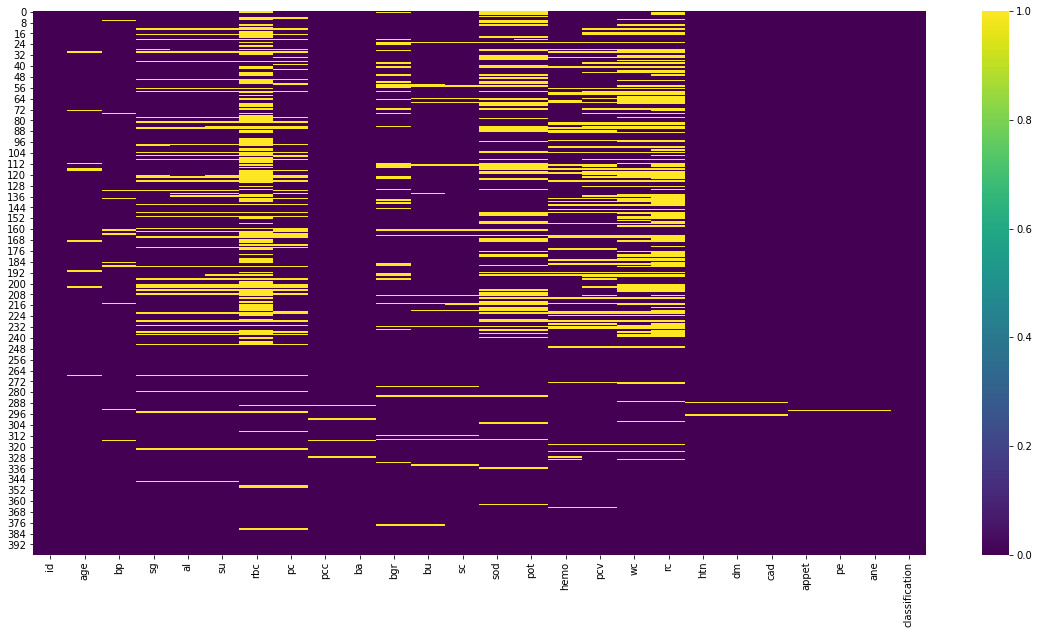

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cmap='viridis')
# A ton of null values to sort out

In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
df['bp'].isnull().sum()

12

<AxesSubplot:>

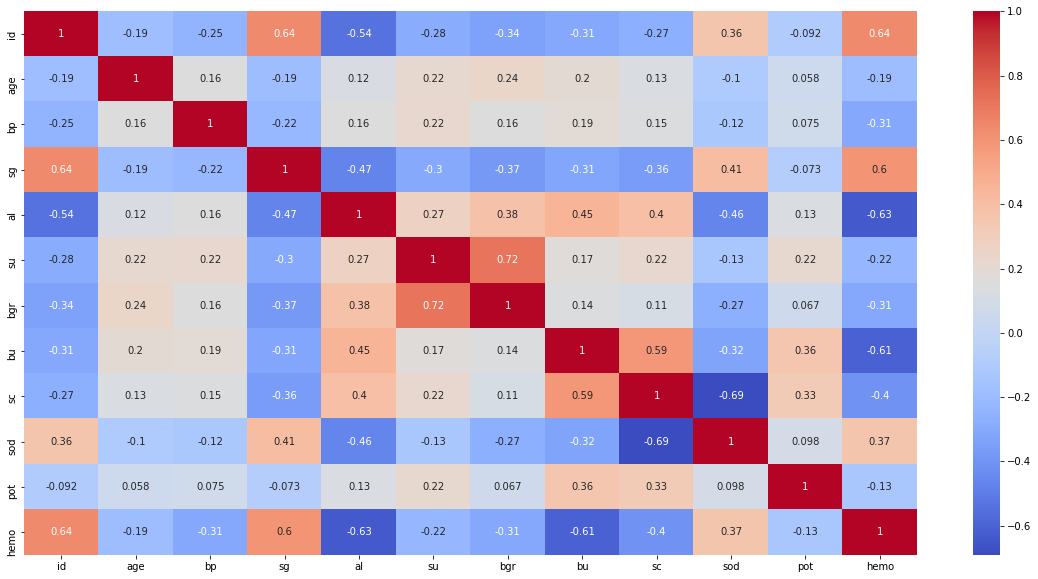

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot =True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [9]:
df[df.columns[5:9]]

,su,rbc,pc,pcc
0,0.0,NaN,normal,notpresent
1,0.0,NaN,normal,notpresent
2,3.0,normal,normal,notpresent
3,0.0,normal,abnormal,present
4,0.0,normal,normal,notpresent
...,...,...,...,...
395,0.0,normal,normal,notpresent
396,0.0,normal,normal,notpresent
397,0.0,normal,normal,notpresent
398,0.0,normal,normal,notpresent


In [10]:
df['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [11]:
df['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [12]:
df['pcc'].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [13]:
df['ba'].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

In [14]:
#replacing object type datapoints to integers
maper = {'normal':1,'abnormal':0}
maper2 = {'notpresent':0,'present':1}
df['rbc'] = df['rbc'].map(maper)
df['rbc'].value_counts()

1.0    201
0.0     47
Name: rbc, dtype: int64

In [15]:
#mapping the rest of the columns
df['pc'] = df['pc'].map(maper)
df['pcc'] = df['pcc'].map(maper2)
df['ba'] = df['ba'].map(maper2)

In [16]:
df[df.columns[18:24]]

,rc,htn,dm,cad,appet,pe
0,5.2,yes,yes,no,good,no
1,NaN,no,no,no,good,no
2,NaN,no,yes,no,poor,no
3,3.9,yes,no,no,poor,yes
4,4.6,no,no,no,good,no
...,...,...,...,...,...,...
395,4.9,no,no,no,good,no
396,6.2,no,no,no,good,no
397,5.4,no,no,no,good,no
398,5.9,no,no,no,good,no


In [17]:
maper = {'yes':1,'no':0}
maper2 = {'good':1,'poor':0}
list_ = ['htn','dm','cad','pe','ane']
for item in list_:
    df[item] = df[item].map(maper)
df[df.columns[18:24]]

,rc,htn,dm,cad,appet,pe
0,5.2,1.0,1.0,0.0,good,0.0
1,NaN,0.0,0.0,0.0,good,0.0
2,NaN,0.0,1.0,0.0,poor,0.0
3,3.9,1.0,0.0,0.0,poor,1.0
4,4.6,0.0,0.0,0.0,good,0.0
...,...,...,...,...,...,...
395,4.9,0.0,0.0,0.0,good,0.0
396,6.2,0.0,0.0,0.0,good,0.0
397,5.4,0.0,0.0,0.0,good,0.0
398,5.9,0.0,0.0,0.0,good,0.0


In [18]:
df['appet'] = df['appet'].map(maper2)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    float64
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [20]:
df.drop(index=66, inplace=True)

In [21]:
df[df['pcv']== '\t43']
df.drop(index = 214, inplace=True)
df['pcv'].value_counts()

52    21
41    21
48    19
44    19
40    16
43    14
42    13
45    13
36    12
33    12
32    12
28    12
50    12
37    11
34    11
30     9
46     9
35     9
29     9
31     8
24     7
39     7
26     6
38     5
53     4
51     4
49     4
47     4
54     4
22     3
27     3
25     3
19     2
23     2
18     1
9      1
20     1
17     1
14     1
16     1
15     1
21     1
Name: pcv, dtype: int64

In [22]:
df['pcv'] = pd.to_numeric(df['pcv'])

In [23]:
df.drop(index = 162, inplace = True)
df['rc'] = pd.to_numeric(df['rc'])

In [24]:
df.drop(index = 185, inplace = True)
df['wc'] = pd.to_numeric(df['wc'])


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              396 non-null    int64  
 1   age             387 non-null    float64
 2   bp              385 non-null    float64
 3   sg              350 non-null    float64
 4   al              351 non-null    float64
 5   su              348 non-null    float64
 6   rbc             247 non-null    float64
 7   pc              332 non-null    float64
 8   pcc             392 non-null    float64
 9   ba              392 non-null    float64
 10  bgr             352 non-null    float64
 11  bu              377 non-null    float64
 12  sc              379 non-null    float64
 13  sod             310 non-null    float64
 14  pot             309 non-null    float64
 15  hemo            345 non-null    float64
 16  pcv             326 non-null    float64
 17  wc              292 non-null    flo

<AxesSubplot:>

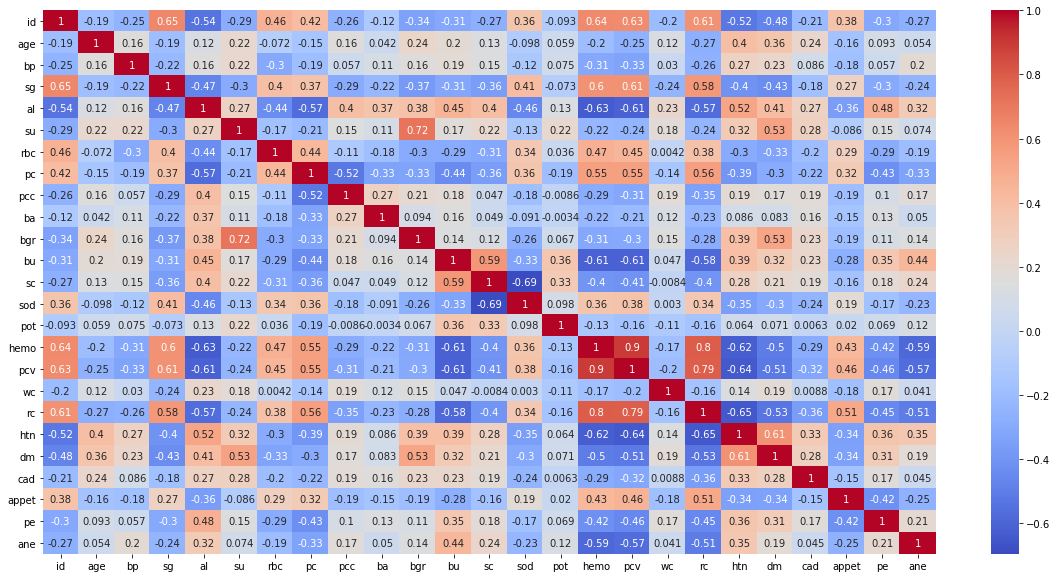

In [26]:
#ok  time to handle the null values
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

In [27]:
#On the lookout for high positive correlation
#1. sg --> hemo,pcv
#2. al---> htn
#3. su --> bgr
#4. pc --> rc
#5. hemo and pcv ---> rc
#6. hemo ---> pcv (strongest)
#Data cleansing thinking process
#1. Using correlation to fill up null values
#2. Getting rid of outliers

<AxesSubplot:>

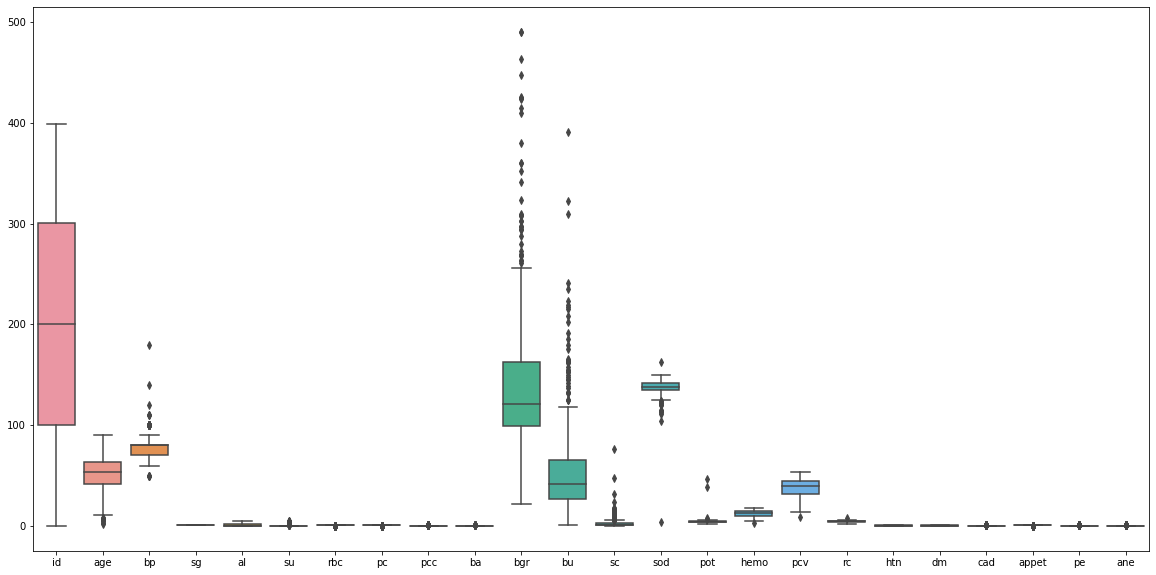

In [28]:
plt.figure(figsize=(20,10))
df2 = df.drop('wc', axis = 1)#values are too large compared to other values
sns.boxplot(data = df2)

In [29]:
#setting upper and lower limits and getting rid of outliers in bgr,bu,bp
upper_limit = df['bgr'].mean() + (3*df['bgr'].std())
lower_limit = df['bgr'].mean() - (3*df['bgr'].std())
df['bgr'] = df[(df['bgr']>lower_limit)&(df['bgr']<upper_limit)]

In [30]:
upper_limit = df['bu'].mean() + (3*df['bu'].std())
lower_limit = df['bu'].mean() - (3*df['bu'].std())
df['bu'] = df[(df['bu']>lower_limit)&(df['bu']<upper_limit)]

In [31]:
upper_limit = df['sod'].mean() + (3*df['sod'].std())
lower_limit = df['sod'].mean() - (3*df['sod'].std())
df['sod'] = df[(df['sod']>lower_limit)&(df['sod']<upper_limit)]

<AxesSubplot:>

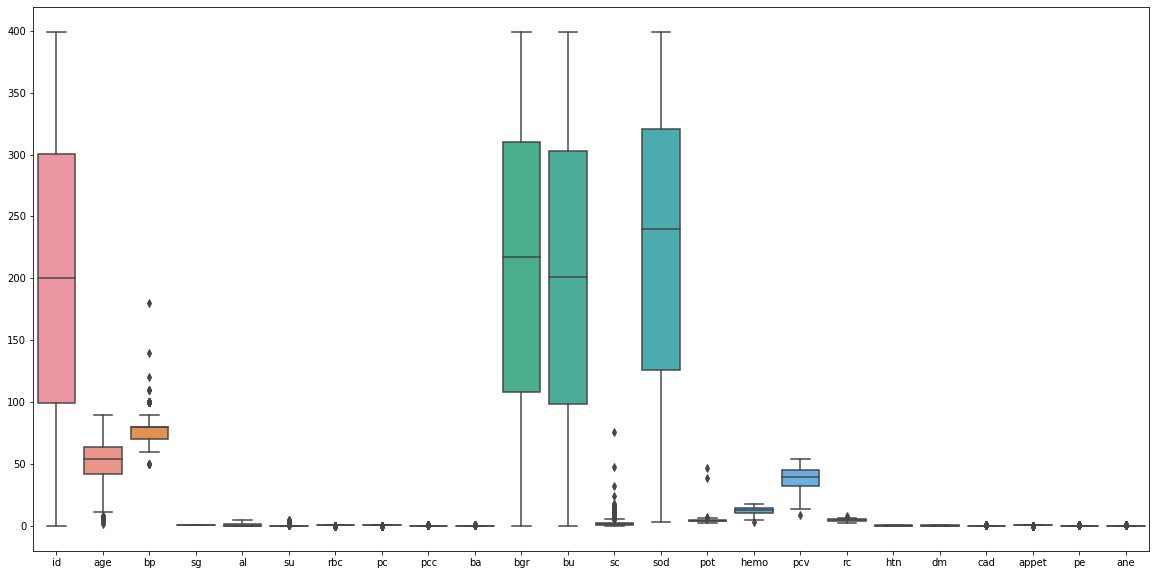

In [32]:
plt.figure(figsize=(20,10))
df2 = df.drop('wc', axis = 1)#values are too large compared to other values
sns.boxplot(data = df2)

In [33]:
#checking for null values again
df['bp'].isnull().sum()

11

In [34]:
#the number of null values in bp seem to have increased 

<AxesSubplot:>

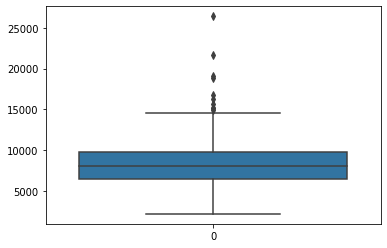

In [35]:
sns.boxplot(data =df['wc'])

In [36]:
#removing outliers for wc
upper_limit = df['wc'].mean() + (3*df['wc'].std())
lower_limit = df['wc'].mean() - (3*df['wc'].std())
df['wc'] = df[(df['wc']>lower_limit)&(df['wc']<upper_limit)]

<AxesSubplot:>

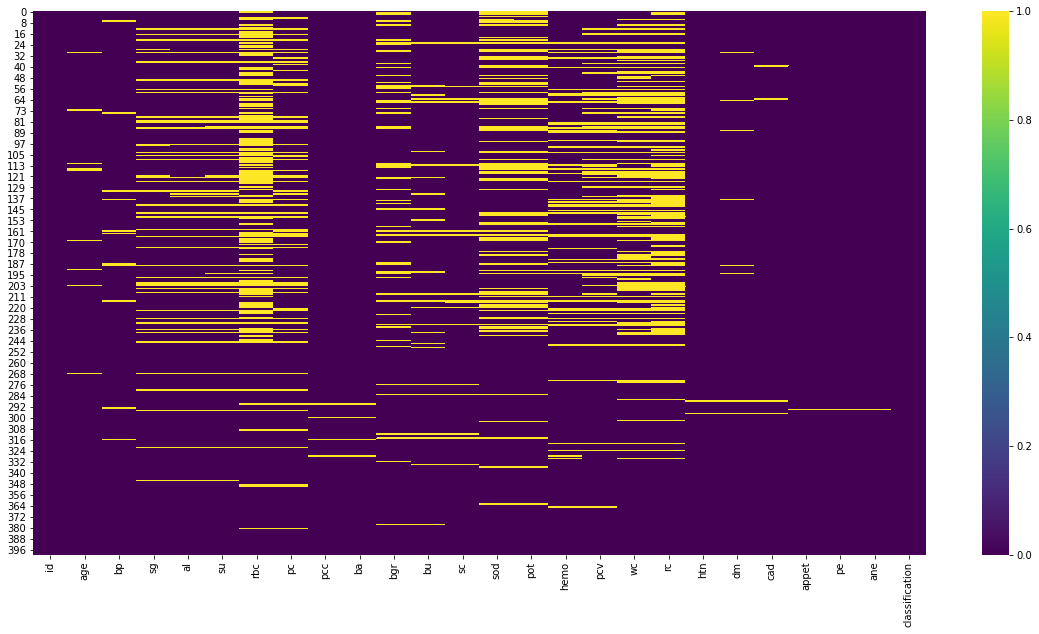

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(data = df.isnull(), cmap= 'viridis')

In [38]:
'''for data with a few null values ex: age,bp etc i will simply fill null with the average value but only data that was initially 
in numeric form'''



'for data with a few null values ex: age,bp etc i will simply fill null with the average value but only data that was initially \nin numeric form'

In [39]:
df['bp']= df['bp'].fillna(df['bp'].mean())
df['age']= df['age'].fillna(df['age'].mean())

In [40]:
df.drop(index=37, inplace= True)
df.drop(index=230, inplace=True)

In [41]:
df['classification'].value_counts()

ckd       244
notckd    150
Name: classification, dtype: int64

In [42]:
d = {'ckd':1,'notckd':0}
df['classification'] = df['classification'].map(d)

In [43]:
df.isnull().sum()
#dropping null values in columns with very few null values

id                  0
age                 0
bp                  0
sg                 45
al                 44
su                 47
rbc               148
pc                 63
pcc                 4
ba                  4
bgr                54
bu                 28
sc                 17
sod                88
pot                87
hemo               50
pcv                69
wc                108
rc                127
htn                 2
dm                  8
cad                 4
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [44]:
df.drop(index = 288, inplace=True)
df.drop(index = 297, inplace=True)
df.isnull().sum()

id                  0
age                 0
bp                  0
sg                 45
al                 44
su                 47
rbc               148
pc                 63
pcc                 4
ba                  4
bgr                54
bu                 28
sc                 17
sod                88
pot                87
hemo               50
pcv                69
wc                108
rc                127
htn                 0
dm                  6
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

<AxesSubplot:>

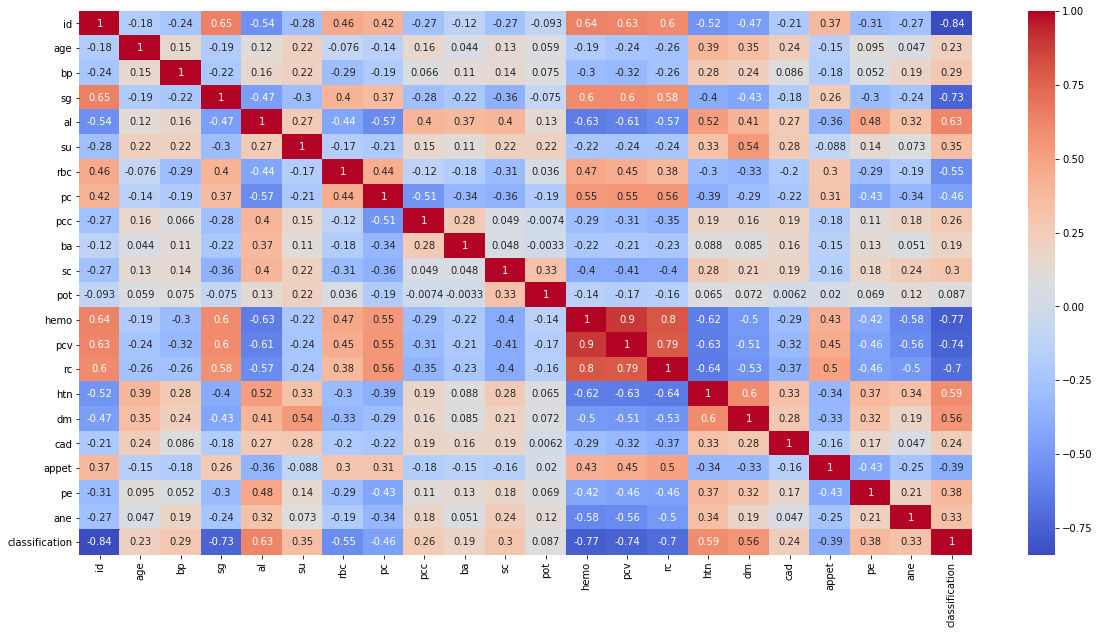

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [46]:
del df['id']

In [47]:
df = df.dropna()

In [48]:
from sklearn.model_selection import train_test_split
X= df[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']]
y = df['classification']

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predict = dtree.predict(X_test)
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [51]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        10

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [52]:
accuracy_score(y_test,predict)

1.0

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [75]:
rfc.fit(X_train,y_train)
predict2 = rfc.predict(X_test)

In [76]:

print(classification_report(y_test,predict2))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        10

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [77]:
accuracy_score(y_test,predict2)

1.0